## Brick Model for Variable Air Volume (VAV) Air Handling Unit (AHU) Tutorial 
* Fan fault condition 1 only
* updated 8/13/24

1. Install py package from PyPI

In [1]:
# Install necessary packages
#!pip install open-fdd rdflib

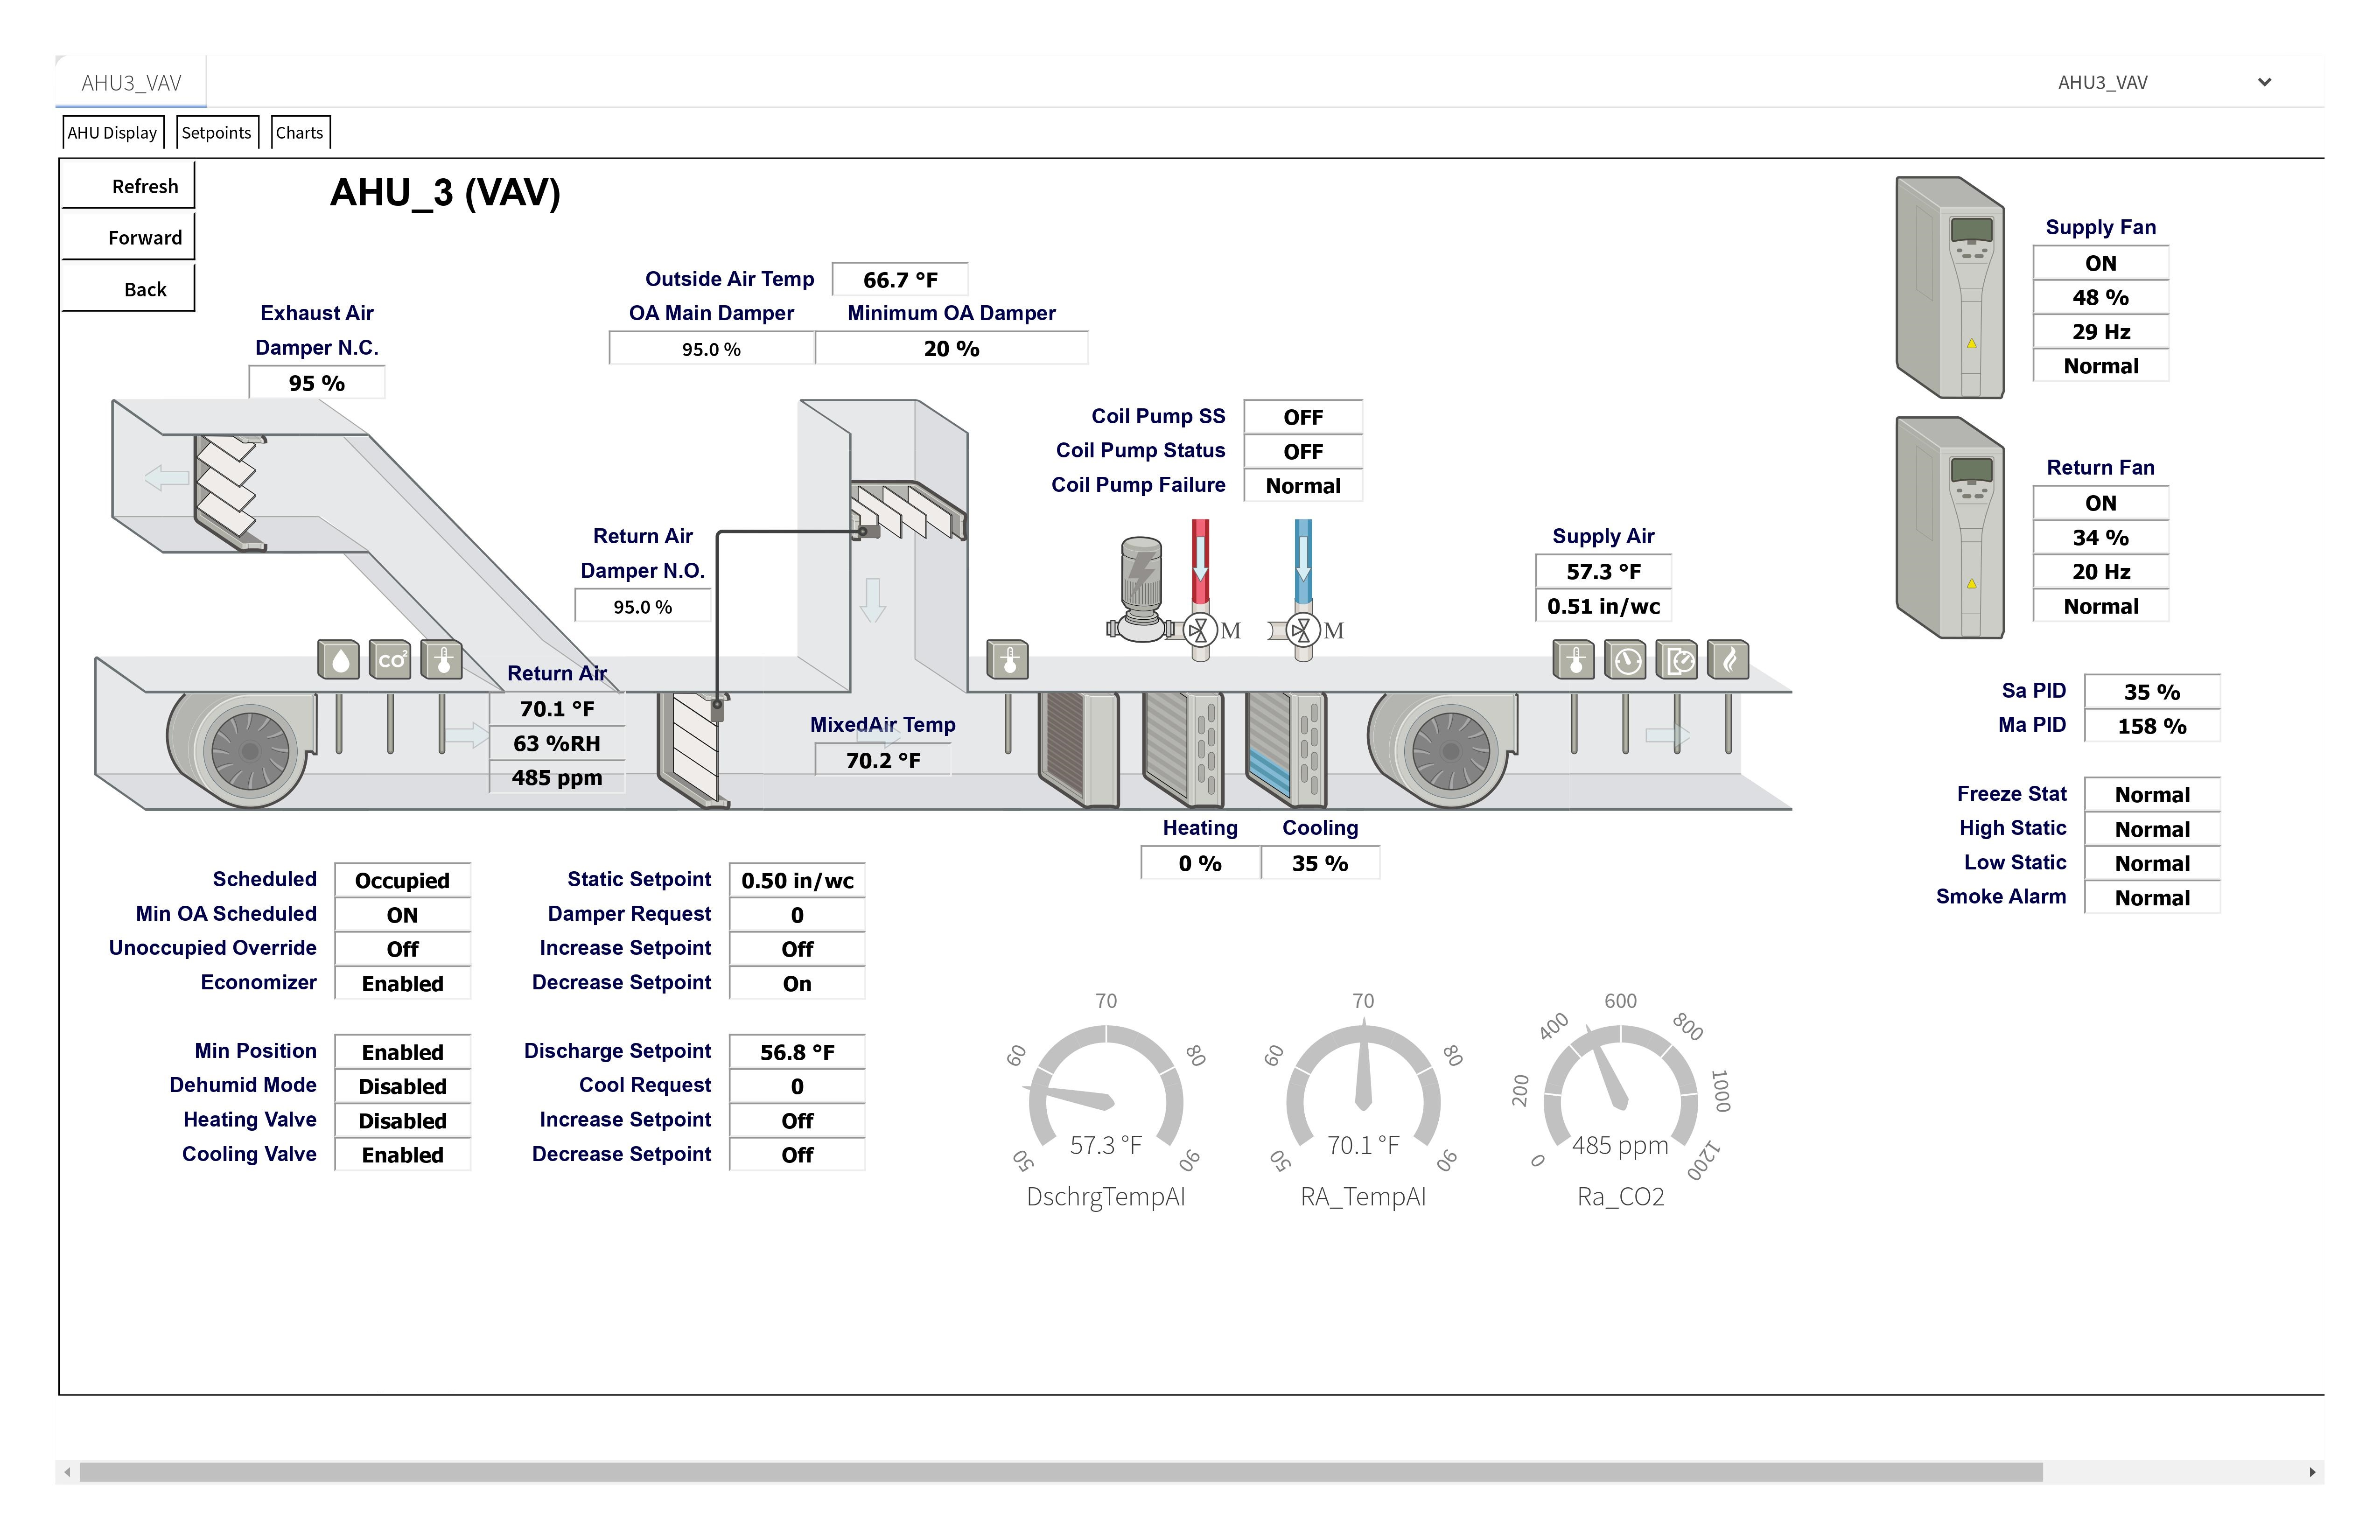

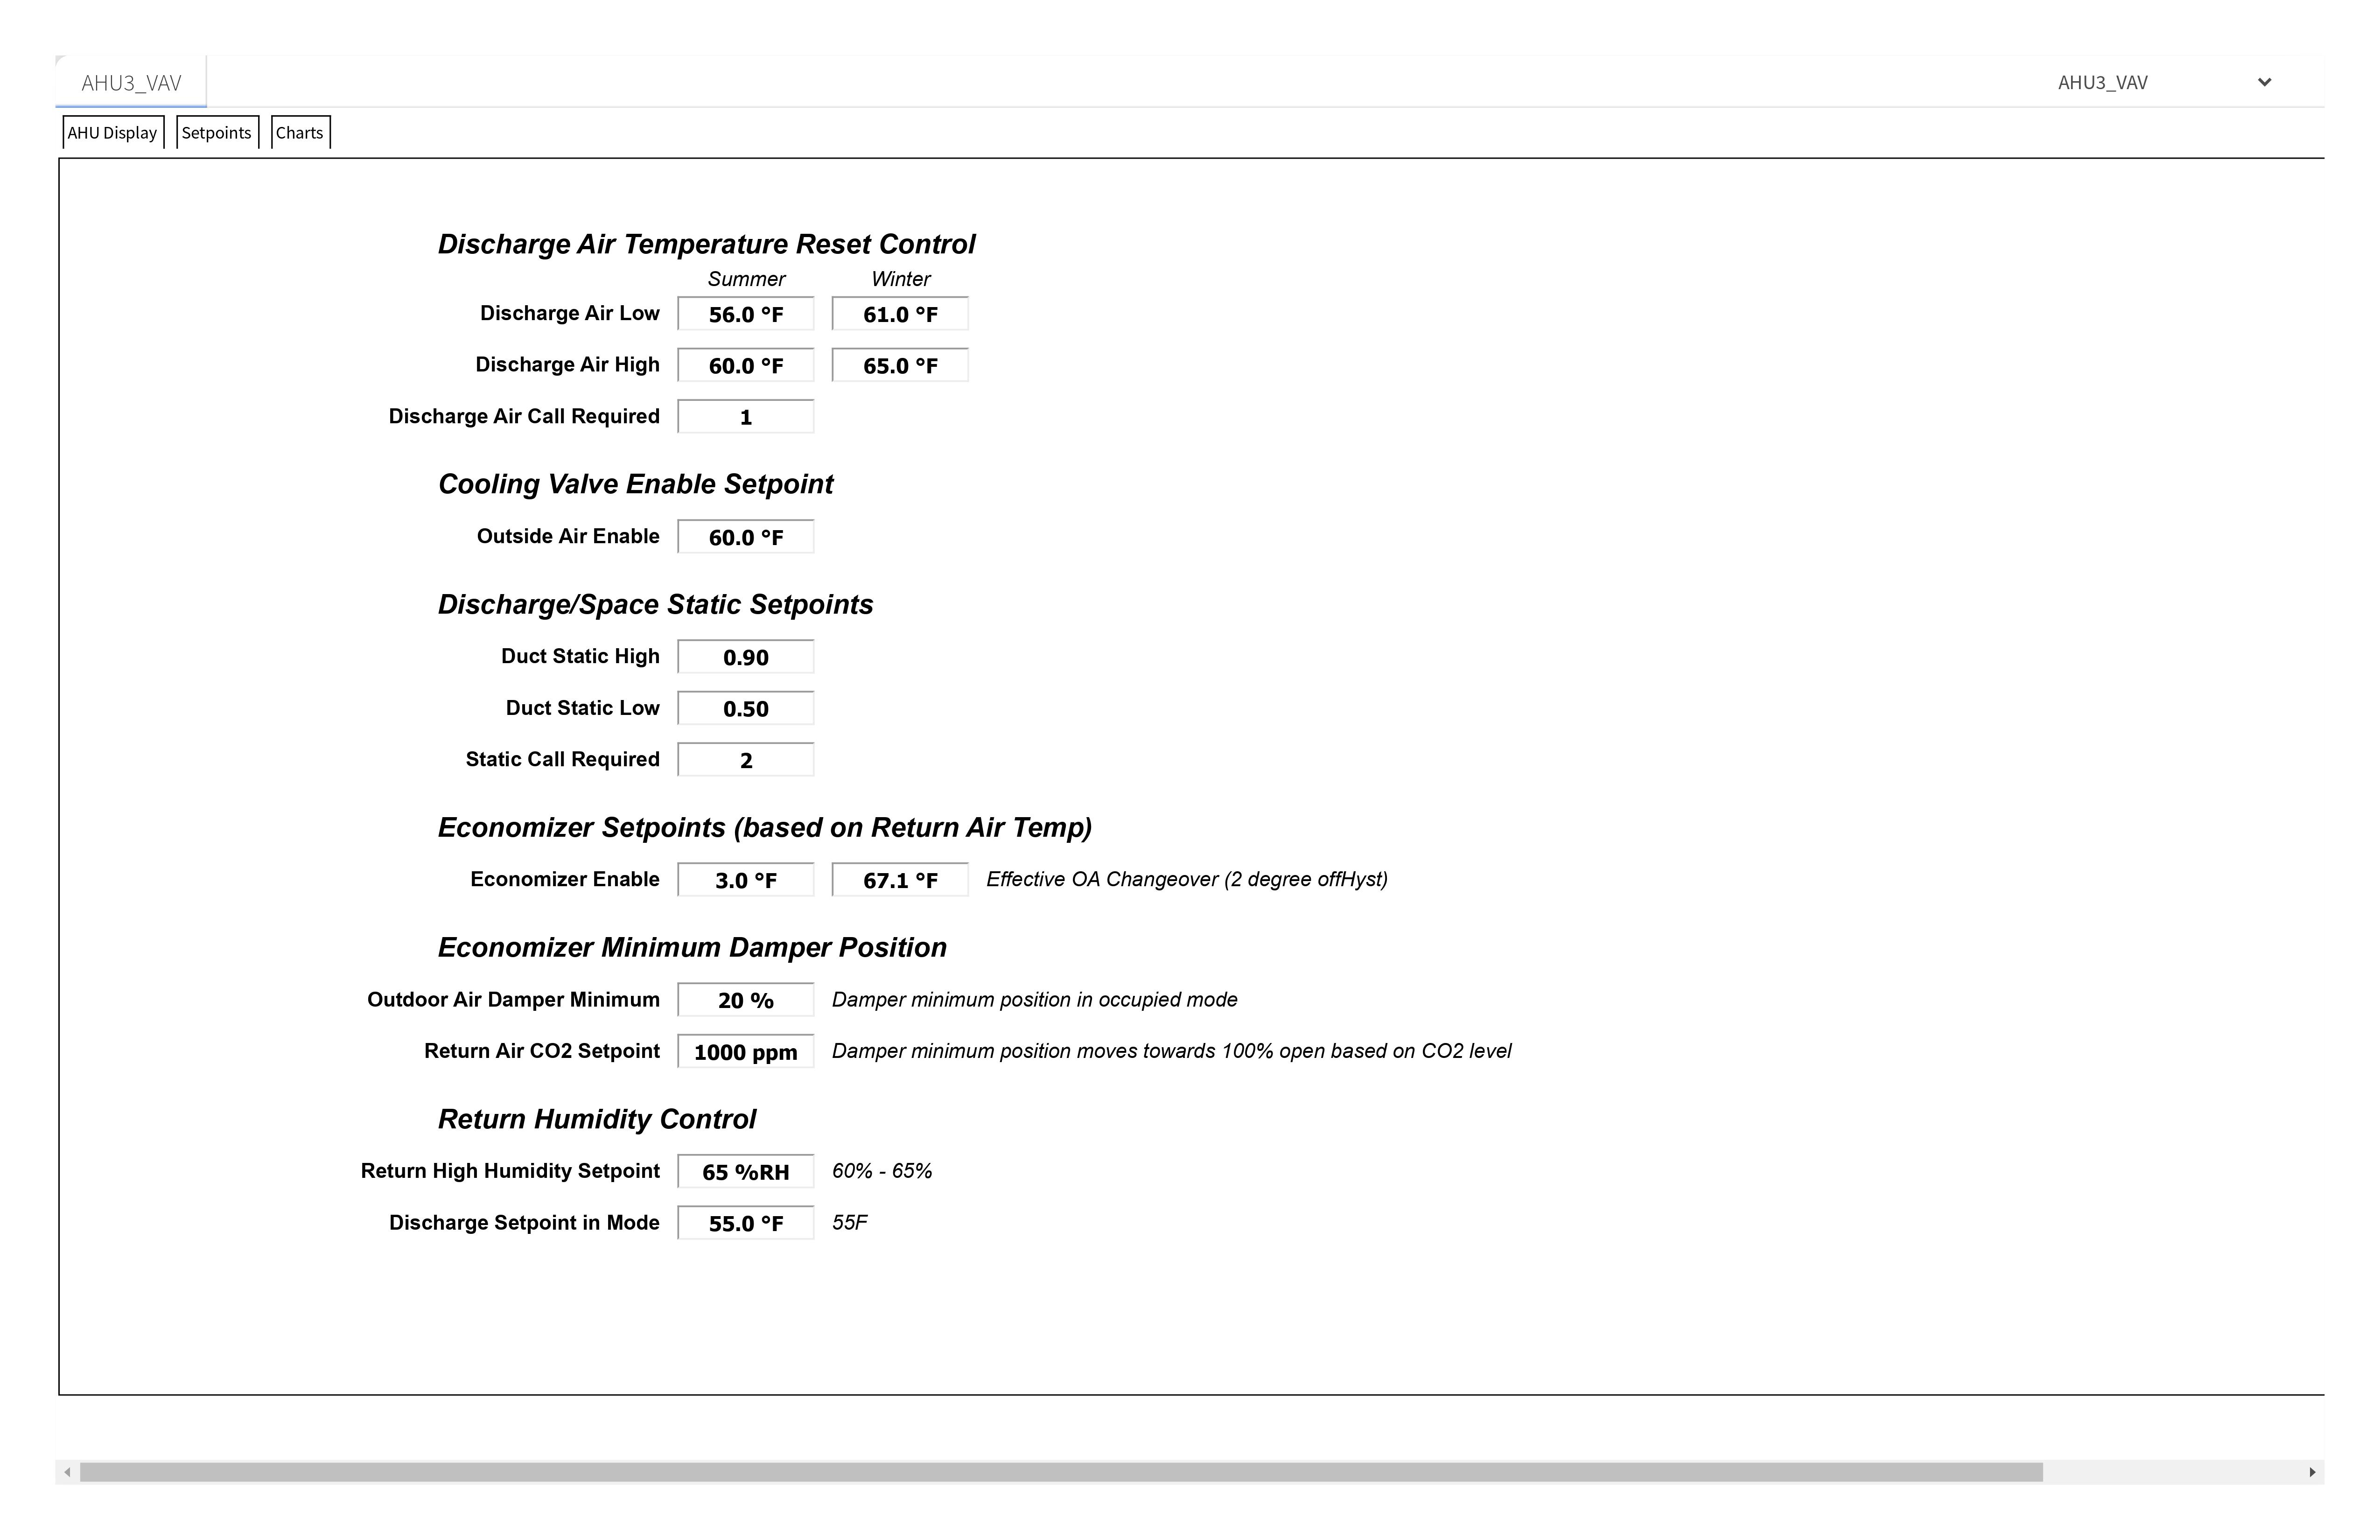

In [2]:
from IPython.display import Image, display

# Specify the path to your JPEG file
image_path1 = "AHU3_VAV.jpg"
image_path2 = "AHU3_points.jpg"

# Display the images
display(Image(filename=image_path1))
display(Image(filename=image_path2))


2. ##Create a Minimal Brick Model

* Fault condition 1 requires just a fan static pressure, static pressure setpoint, and fan speed command. See this for more details https://github.com/bbartling/open-fdd/tree/master/open_fdd/air_handling_unit#fault-equation-tutorials

In [3]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS

# Define the Brick namespace
BRICK = Namespace("https://brickschema.org/schema/1.1/Brick#")
BRICKFRAME = Namespace("https://brickschema.org/schema/1.1/BrickFrame#")

# Initialize the graph
brick_graph = Graph()

# Bind the Brick namespace to a prefix
brick_graph.bind("brick", BRICK)
brick_graph.bind("brickframe", BRICKFRAME)

# Create the Air Handling Unit (AHU) and related sensors
ahu = URIRef("http://example.com/building/AHU1")
duct_static_sensor = URIRef("http://example.com/building/Supply_Air_Static_Pressure_Sensor")
vfd_speed_sensor = URIRef("http://example.com/building/Supply_Fan_VFD_Speed_Sensor")
static_pressure_setpoint = URIRef("http://example.com/building/Static_Pressure_Setpoint")

# Define the types for the AHU and sensors
brick_graph.add((ahu, RDF.type, BRICK.Air_Handler_Unit))
brick_graph.add((duct_static_sensor, RDF.type, BRICK.Supply_Air_Static_Pressure_Sensor))
brick_graph.add((vfd_speed_sensor, RDF.type, BRICK.Supply_Fan_VFD_Speed_Sensor))
brick_graph.add((static_pressure_setpoint, RDF.type, BRICK.Static_Pressure_Setpoint))

# Define the relationships (the sensors are part of the AHU)
brick_graph.add((ahu, BRICKFRAME.hasPoint, duct_static_sensor))
brick_graph.add((ahu, BRICKFRAME.hasPoint, vfd_speed_sensor))
brick_graph.add((ahu, BRICKFRAME.hasPoint, static_pressure_setpoint))

# Add labels (optional)
brick_graph.add((ahu, RDFS.label, Literal("Air Handling Unit 1")))
brick_graph.add((duct_static_sensor, RDFS.label, Literal("Supply Air Static Pressure Sensor")))
brick_graph.add((vfd_speed_sensor, RDFS.label, Literal("Supply Fan VFD Speed Sensor")))
brick_graph.add((static_pressure_setpoint, RDFS.label, Literal("Static Pressure Setpoint")))

<Graph identifier=N38502715d14a4e5ca869e0367d4b1cd9 (<class 'rdflib.graph.Graph'>)>

In [4]:
for s, p, o in brick_graph:
    print(f"Subject: {s}, Predicate: {p}, Object: {o}")


Subject: http://example.com/building/Supply_Air_Static_Pressure_Sensor, Predicate: http://www.w3.org/1999/02/22-rdf-syntax-ns#type, Object: https://brickschema.org/schema/1.1/Brick#Supply_Air_Static_Pressure_Sensor
Subject: http://example.com/building/AHU1, Predicate: http://www.w3.org/2000/01/rdf-schema#label, Object: Air Handling Unit 1
Subject: http://example.com/building/AHU1, Predicate: https://brickschema.org/schema/1.1/BrickFrame#hasPoint, Object: http://example.com/building/Supply_Fan_VFD_Speed_Sensor
Subject: http://example.com/building/Supply_Fan_VFD_Speed_Sensor, Predicate: http://www.w3.org/2000/01/rdf-schema#label, Object: Supply Fan VFD Speed Sensor
Subject: http://example.com/building/AHU1, Predicate: https://brickschema.org/schema/1.1/BrickFrame#hasPoint, Object: http://example.com/building/Static_Pressure_Setpoint
Subject: http://example.com/building/Supply_Air_Static_Pressure_Sensor, Predicate: http://www.w3.org/2000/01/rdf-schema#label, Object: Supply Air Static Pres

In [5]:
# Sample query for Supply_Air_Static_Pressure_Sensor
query = """
SELECT ?s WHERE {
    ?s rdf:type <https://brickschema.org/schema/1.1/Brick#Supply_Air_Static_Pressure_Sensor> .
}
"""
results = brick_graph.query(query)
for row in results:
    print(f"Found entity: {row.s}")


Found entity: http://example.com/building/Supply_Air_Static_Pressure_Sensor


Load data with Pandas

In [6]:
import pandas as pd
import numpy as np

# Load your data
ahu_data = r"C:\Users\bbartling\Documents\WPCRC_Master.csv"
df = pd.read_csv(ahu_data)

df.head()

,timestamp,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
0,2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
1,2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2,2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
3,2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
4,2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [7]:
# Checking data types of each column
print("Data Types:")
print(df.dtypes)

Data Types:
timestamp            object
HWR_value           float64
HWS_value           float64
Heat_Calls          float64
Oa_Temp             float64
OaTemp_Enable       float64
CWR_Temp            float64
CWS_Temp            float64
CWS_Freeze_SPt      float64
CW_Valve            float64
HW_Valve            float64
DischargeTemp       float64
Eff_DaSP            float64
RaHumidity          float64
Ra_Temp             float64
Ra_FanSpeed         float64
OaTemp              float64
Ma_Dampers          float64
Ma_Temp             float64
SaStaticSPt         float64
Sa_FanSpeed         float64
SaTempSP            float64
RaCO2               float64
SaStatic            float64
CurrentKWHrs        float64
CurrentKW           float64
Eff_DaSPt           float64
RaTemp              float64
MaLowSPt            float64
MaDampers           float64
SaStatic_SPt        float64
SaTempSPt           float64
CoolValve           float64
OA_Damper           float64
MA_Temp             float64
EffSetpo

In [8]:
# Checking max values of each column
print("\nMax Values:")
print(df.max(numeric_only=True))


Max Values:
HWR_value            178.16
HWS_value            180.55
Heat_Calls            15.00
Oa_Temp               98.55
OaTemp_Enable         75.00
CWR_Temp              92.10
CWS_Temp              91.04
CWS_Freeze_SPt         5.00
CW_Valve             100.00
HW_Valve             100.00
DischargeTemp         96.73
Eff_DaSP              63.00
RaHumidity            88.44
Ra_Temp               81.82
Ra_FanSpeed           86.00
OaTemp                98.55
Ma_Dampers           100.00
Ma_Temp               80.38
SaStaticSPt            0.90
Sa_FanSpeed          100.00
SaTempSP              70.00
RaCO2               1321.36
SaStatic               0.87
CurrentKWHrs          15.30
CurrentKW            120.98
Eff_DaSPt             63.00
RaTemp                79.19
MaLowSPt              64.62
MaDampers             50.00
SaStatic_SPt           0.90
SaTempSPt             70.00
CoolValve            100.00
OA_Damper            100.00
MA_Temp               80.73
EffSetpoint           76.00
EaDampe

As noted above, these columns represent float values ranging from 0 to 100.0 for the control system's analog outputs. Open-fdd expects these values to be in the range of 0 to 1.0 to represent percentages. Some control system data is provided as 0 to 100.0, while others are in the 0 to 1.0 range. If you pass a 0 to 100.0 value for the control system's analog outputs, the check_analog_pct method will flag this as a ValueError. This method checks the data type and range of these values, raising an error if the maximum value exceeds 1.0, ensuring that the data conforms to the expected format.

```python
Sa_FanSpeed          100.00
CW_Valve             100.00
HW_Valve             100.00
Ma_Dampers           100.00
```

In [9]:

percentage_columns = [
    ["Sa_FanSpeed"],
    ["CW_Valve"],
    ["HW_Valve"],
    ["Ma_Dampers"],
]

for col in percentage_columns:
    df[col] = df[col] / 100.0

df.head()

,timestamp,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
0,2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
1,2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2,2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
3,2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
4,2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [10]:
# Convert the timestamp column to datetime and set it as the index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

df.head()

,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,HW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [11]:
from open_fdd.air_handling_unit.faults.fault_condition_one import FaultConditionOne

column_mapping = {
    'http://example.com/building/Supply_Air_Static_Pressure_Sensor': 'SaStatic',
    'http://example.com/building/Supply_Fan_VFD_Speed_Sensor': 'Sa_FanSpeed',
    'http://example.com/building/Static_Pressure_Setpoint': 'SaStaticSPt',
}

# Initialize the fault condition with Brick graph, column mapping, troubleshoot_mode, and rolling_window_size
fc1 = FaultConditionOne(brick_graph, column_mapping, troubleshoot_mode=True, rolling_window_size=10)

# Apply the fault condition to your DataFrame
df_fc1 = fc1.apply(df)

# Check the results
print(df_fc1.head())


Duct Static Sensors found: [rdflib.term.URIRef('http://example.com/building/Supply_Air_Static_Pressure_Sensor')]
VFD Speed Sensors found: [rdflib.term.URIRef('http://example.com/building/Supply_Fan_VFD_Speed_Sensor')]
Static Pressure Setpoints found: [rdflib.term.URIRef('http://example.com/building/Static_Pressure_Setpoint')]
Mapped duct_static_col: SaStatic
Mapped supply_vfd_speed_col: Sa_FanSpeed
Mapped duct_static_setpoint_col: SaStaticSPt
Troubleshoot mode enabled - additional debug information will be printed.
Troubleshoot mode enabled - not removing helper columns
df column:  HWR_value - max:  178.16 - col type:  float64
df column:  HWS_value - max:  180.55 - col type:  float64
df column:  Heat_Calls - max:  15.0 - col type:  float64
df column:  Oa_Temp - max:  98.55 - col type:  float64
df column:  OaTemp_Enable - max:  75.0 - col type:  float64
df column:  CWR_Temp - max:  92.1 - col type:  float64
df column:  CWS_Temp - max:  91.04 - col type:  float64
df column:  CWS_Freeze_S

open-fdd adds a new column to the df named `fc1_flag` for a boolean flag is faults were found.

In [12]:
df_fc1.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'static_check_', 'fan_check_', 'combined_check', 'fc1_flag'],
      dtype='object')

In [13]:
df_fc1['fc1_flag'].sum()


np.int64(0)

The open-fdd `reports` classes for each fault condition are pre-built to plot the associated data with the fault equation. However, when a large number of faults are flagged, the resulting chart may contain too much data to easily interpret. In such cases, breaking it down into smaller data plots may be necessary to better understand what's happening.

The `reports` classes also print out some metrics as well that could be useful in troubleshooting.

Fault Condition 1: Duct static too low at fan at full speed


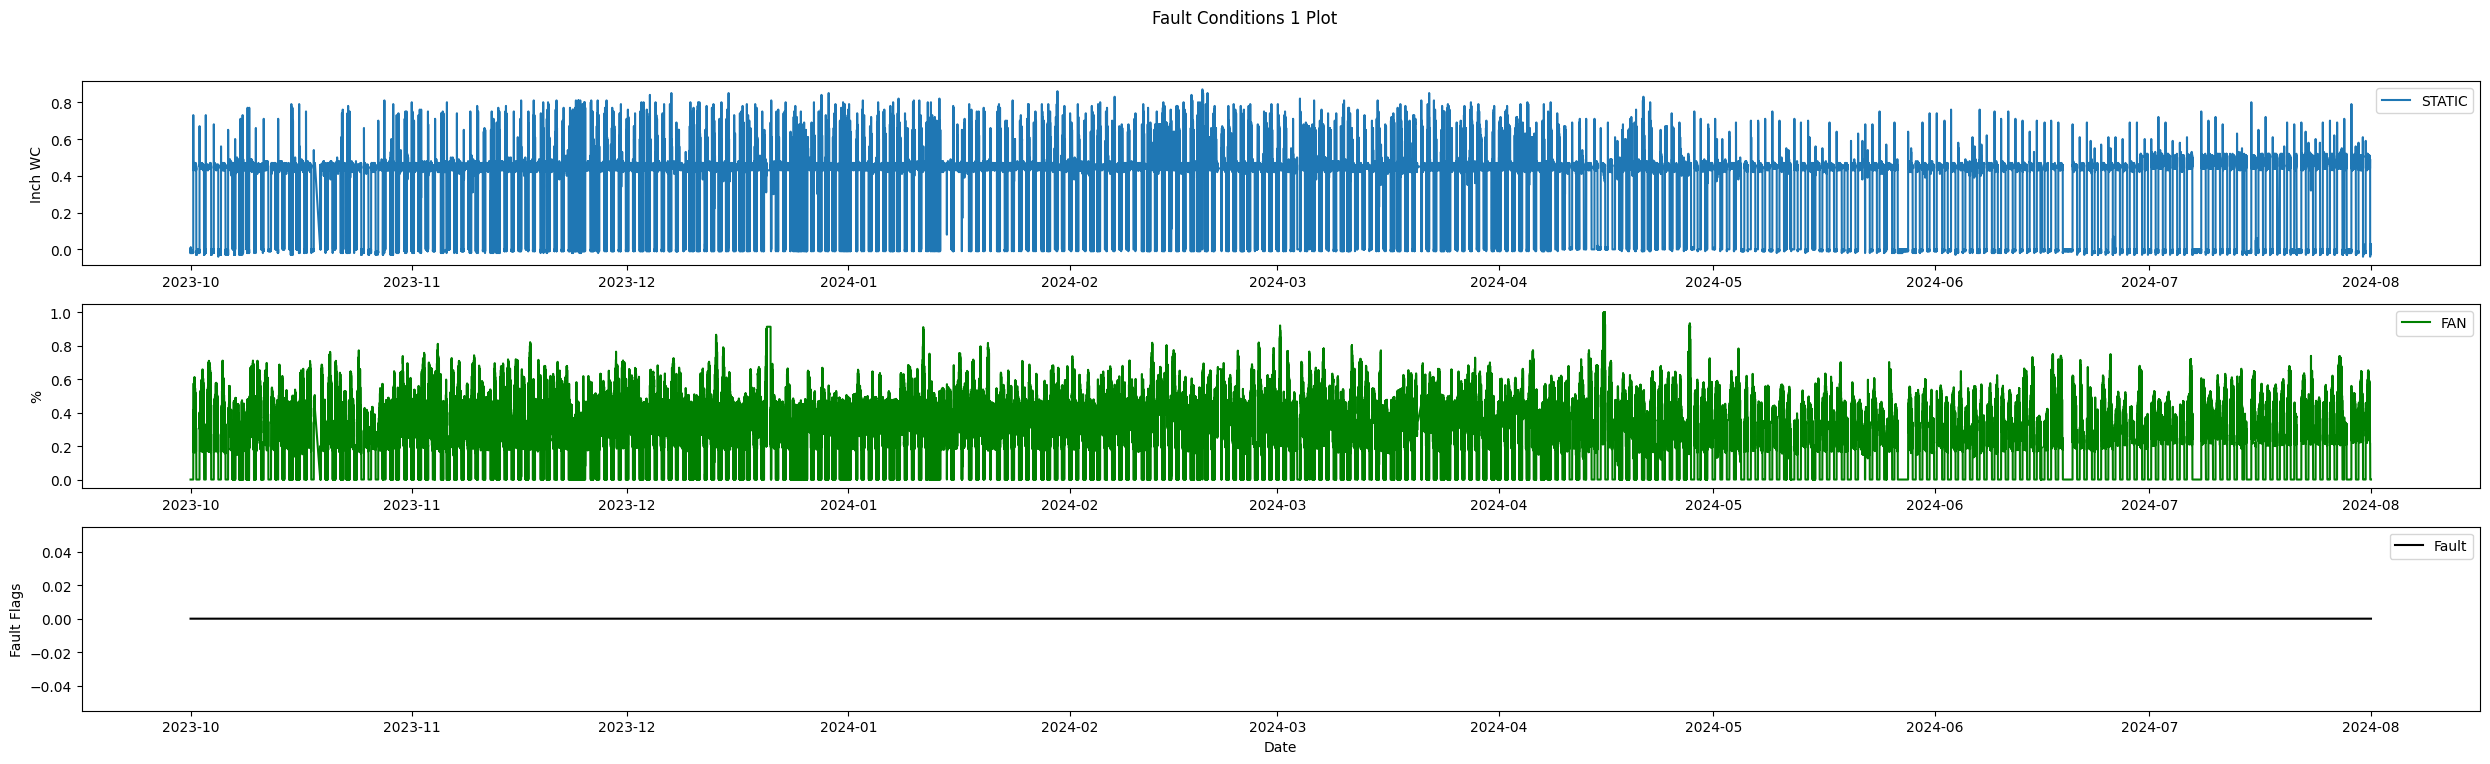

total days: 305.0
total hours: 7320
hours fc1 mode: 0
percent true: 0.0
percent false: 100.0
flag true duct static: nan
flag true duct static spt: nan
hours motor runtime: 5484.23
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [14]:
from open_fdd.air_handling_unit.reports.report_fc1 import FaultCodeOneReport

# Generate a report using the updated FaultCodeOneReport class
fc1_report = FaultCodeOneReport(fc1)
fc1_report.display_report_in_ipython(df_fc1)